# Polycrystalline graphene



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from psm import plotutils
from psm.graph import urquhart
from psm.structures import traverse_from_all
from psm.build import lattice_traversal
from psm.register import RMSD
from psm.geometry import transform

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sample Structure

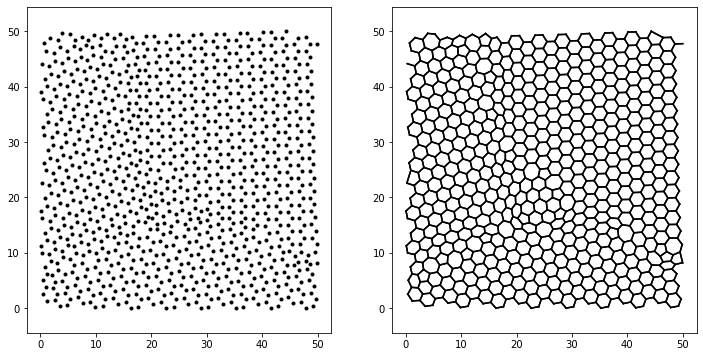

In [2]:
points = np.load('data/poly_graphene.npy')
adjacency = urquhart(points)

fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].plot(points[:,0], points[:,1], 'k.')
plotutils.graph_embedding(points, adjacency, ax = axes[1])
for ax in axes:
    ax.axis('equal')

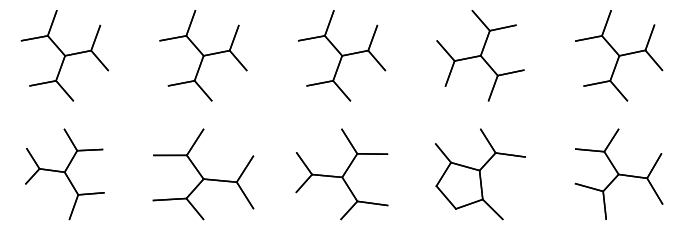

In [3]:
structures = traverse_from_all(points, adjacency, max_depth=3)

fig,axes = plt.subplots(2,5,figsize=(12,4))
plotutils.show_structures(structures, axes=axes.ravel())
for ax in axes.ravel():
    ax.axis('equal')
    ax.axis('off')

## Template structure

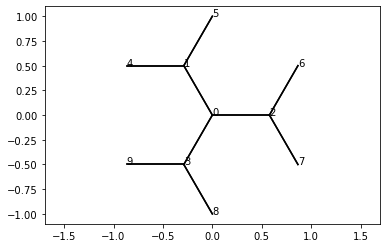

In [4]:
a = [0, 1]
b = [np.sin(2/3*np.pi), np.cos(2/3*np.pi)]
basis = [[0,0],[1/np.sqrt(3), 0]]

templates = lattice_traversal(a, b, basis, max_depth=3, graph_func=urquhart)

axes = plotutils.show_structures(templates,show_order=True)
for ax in axes:
    ax.axis('equal')

## Pairing

In [5]:
rmsd_calc = RMSD(transform='similarity', pivot='cop')
rmsd = rmsd_calc.register(templates, structures)

 [||||||||||||||||||||] 1031/1031 registrations


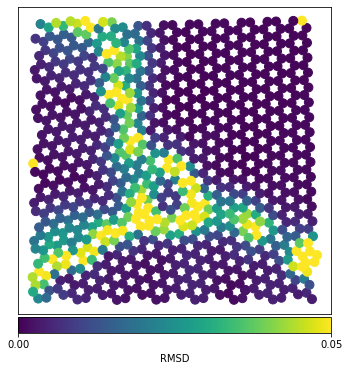

In [6]:
_, best_rmsd = rmsd_calc.best_matches(structures)

fig,ax = plt.subplots(1,1,figsize=(6,6))
p = plt.scatter(structures.fronts[:,0], structures.fronts[:,1],
            c=best_rmsd, cmap='viridis', vmin=0, vmax=.05, s=80)

plotutils.add_colorbar(p, ax, 'bottom', label='RMSD', ticks=np.linspace(0,.2,5))

ax.axis('equal')
ax.set_xticks([])
ax.set_yticks([]);

## Strain

In [7]:
strain, rotation = rmsd_calc.calc_strain(structures)
strain = transform.zero_median(strain)

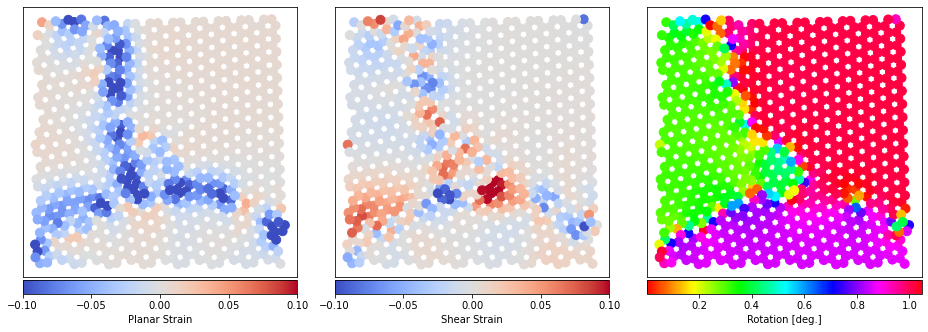

In [8]:
planar = transform.planar_strain(strain)
shear = strain[:,0,1]
rotation = rotation % (np.pi/3)

fig,axes = plt.subplots(1,3,figsize=(13,6))

p = axes[0].scatter(structures.fronts[:,0], structures.fronts[:,1],
                c=planar, cmap='coolwarm', vmin=-.1, vmax=.1, s=80)
plotutils.add_colorbar(p, axes[0], 'bottom', label='Planar Strain', ticks=np.linspace(-0.1,.1,5))

p = axes[1].scatter(structures.fronts[:,0], structures.fronts[:,1],
                c=shear, cmap='coolwarm', vmin=-.1, vmax=.1, s=80)
plotutils.add_colorbar(p, axes[1], 'bottom', label='Shear Strain', ticks=np.linspace(-0.1,.1,5))

p = axes[2].scatter(structures.fronts[:,0], structures.fronts[:,1],
               c=rotation, cmap='hsv', s=80)
plotutils.add_colorbar(p, axes[2], 'bottom', label='Rotation [deg.]')

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()